<a href="https://colab.research.google.com/github/joaquinparodi/TP1-DATOS/blob/main/tp1orgaOmar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
!pip install ptitprince
import ptitprince as pt
import pandas as pd
import numpy as np


     |████████████████████████████████| 61kB 2.8MB/s 
  Created wheel for ptitprince: filename=ptitprince-0.2.5-cp36-none-any.whl size=8427 sha256=274256044d7403b31ac99e283746f838f987f4b886e988043d76cad2f1596bda
  Stored in directory: /root/.cache/pip/wheels/fb/c1/75/2ef8da161053bdf8e03f9a360f426accd4fac1ddf7f6ed0029
Successfully built ptitprince


In [2]:
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
 
id='1aIyEwjxvHeljU-gu-iQMlHI596nZRPFJ'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('data.csv')

In [7]:
#1)Apertura
entrenamiento = pd.read_csv('data.csv')
entrenamiento.tail(5)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,4/4/2016,4/8/2016,2016 - 4,Q2,2016,NaT,0,EUR,93015.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16944,8792,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/28/2016,3/31/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16945,28561,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,10/20/2015,None,United States,Account_Name_944,Opportunity_Name_5843,12802,None,Person_Name_3,Person_Name_3,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/5/2015,None,None,None,None,None,None,NaT,2/29/2016,1/22/2016,Person_Name_3,Product_Family_158,Product_Name_287,USD,0.6375,USD,0.63750,4/25/2016,4/29/2016,2016 - 4,Q2,2016,NaT,4,USD,2346796.88,USD,0.0,Closed Lost,Prod_Category_A_None
16946,28318,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,9/3/2015,None,United States,Account_Name_1401,Opportunity_Name_9911,12803,None,Person_Name_3,Person_Name_3,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_4,12/5/2015,None,None,None,None,None,None,NaT,1/6/2016,9/28/2016,Person_Name_3,Product_Family_164,Product_Name_307,USD,0.6400,USD,0.64000,7/1/2016,8/31/2016,2016 - 7,Q3,2016,NaT,40,USD,25603200.00,USD,0.0,Closed Lost,Prod_Category_A_None


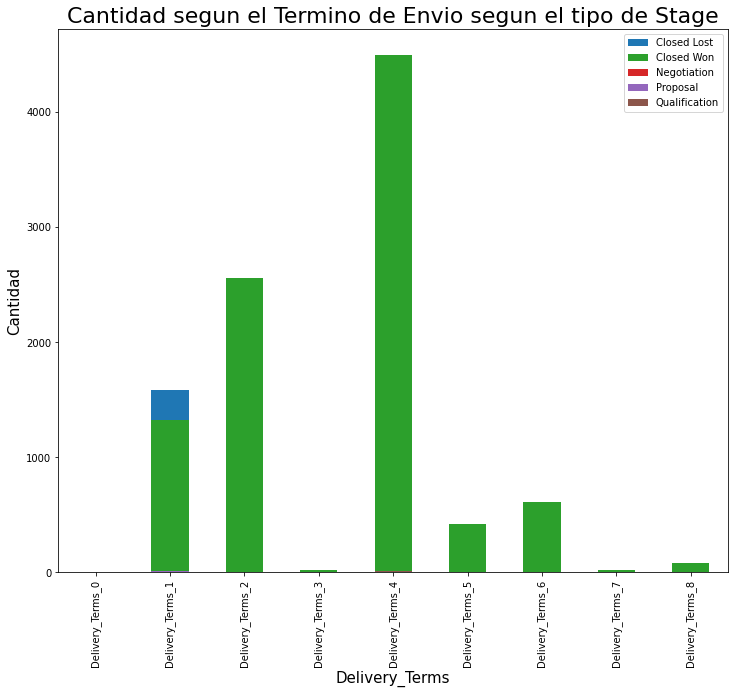

In [ ]:
delivery_terms_stage=entrenamiento.groupby(['Delivery_Terms','Stage']).agg(cantidad=('Stage','count'))
delivery_terms_stage=delivery_terms_stage.unstack(level='Stage').fillna(0)
delivery_terms_stage.columns=['Closed Lost' ,	'Closed Won', 	'Negotiation' ,	'Proposal', 	'Qualification']
delivery_terms_stage=delivery_terms_stage.reset_index()
fig, ax = plt.subplots(figsize=(12,10) ) 
ax = delivery_terms_stage.plot(x="Delivery_Terms", y="Closed Lost", kind="bar", ax=ax)
ax.set_title("Cantidad segun el Termino de Envio segun el tipo de Stage", fontsize=22)
ax.set_xlabel("Stage",fontsize=15)
ax.set_ylabel("Cantidad", fontsize=15)  
delivery_terms_stage.plot(x="Delivery_Terms", y="Closed Won", kind="bar", ax=ax, color="C2")
delivery_terms_stage.plot(x="Delivery_Terms", y="Negotiation", kind="bar", ax=ax, color="C3")
delivery_terms_stage.plot(x="Delivery_Terms", y="Proposal", kind="bar", ax=ax, color="C4")
delivery_terms_stage.plot(x="Delivery_Terms", y="Qualification", kind="bar", ax=ax, color="C5")
 
plt.show()

In [ ]:
df=entrenamiento
df['Month']=pd.to_datetime(entrenamiento['Month'])
df['anio']=df['Month'].dt.year
df['mes']=df['Month'].dt.month

In [ ]:
df=df.groupby(['mes','Stage']).agg(cant=('ID','count'))

In [ ]:
df

cant
mes Stage              
1   Closed Lost     613
    Closed Won      672
    Negotiation       5
    Proposal          8
    Qualification     1
2   Closed Lost     688
    Closed Won      695
    Negotiation       3
    Proposal          2
3   Closed Lost     800
    Closed Won      827
    Proposal          3
4   Closed Lost     651
    Closed Won      825
    Negotiation       2
    Proposal          4
    Qualification     2
5   Closed Lost     574
    Closed Won      816
    Negotiation       4
    Proposal          2
6   Closed Lost     680
    Closed Won      877
    Negotiation       3
    Proposal          2
    Qualification     1
7   Closed Lost     690
    Closed Won      796
    Proposal          5
    Qualification     1
8   Closed Lost     601
    Closed Won      668
    Negotiation       1
    Proposal          1
9   Closed Lost     522
    Closed Won      754
    Proposal          4
10  Closed Lost     710
    Closed Won      958
    Proposal          2
    Qualification     6
11  Closed Lost     462
    Closed Won      828
    Proposal          1
12  Closed Lost     359
    Closed Won      817
    Proposal          1

Text(0, 0.5, 'Mes')

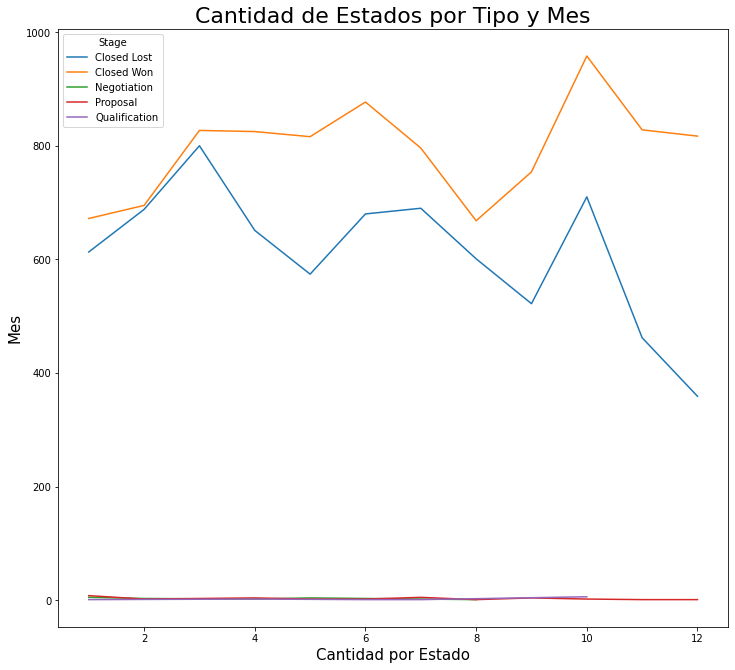

In [ ]:
fig, ax = plt.subplots(figsize=(12,11))
g=sns.lineplot(data=df, x="mes", y="cant", hue="Stage",ax=ax)
g.set_title("Cantidad de Estados por Tipo y Mes", fontsize=22)
g.set_xlabel("Cantidad por Estado",fontsize=15)
g.set_ylabel("Mes", fontsize=15)

Text(0, 0.5, 'Anio')

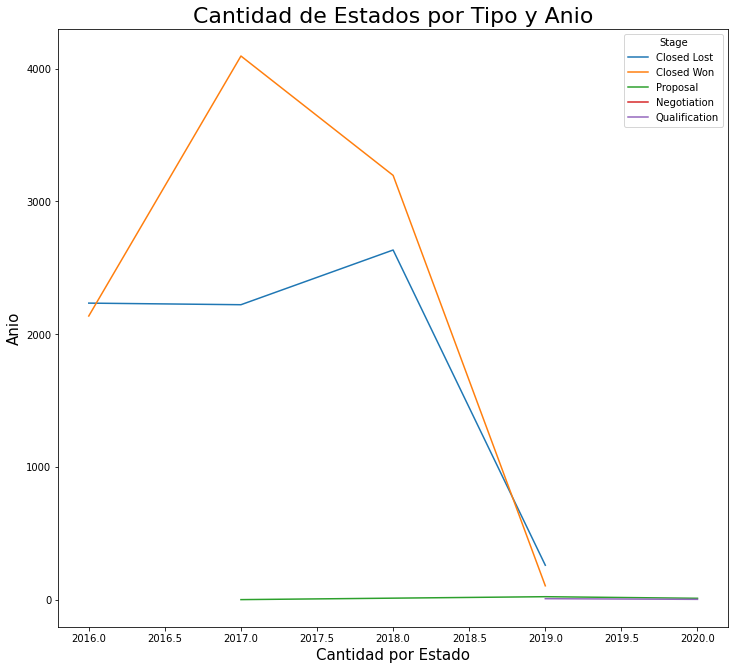

In [ ]:
df2=entrenamiento.groupby(['anio','Stage']).agg(cant=('ID','count'))
fig, ax = plt.subplots(figsize=(12,11))
g=sns.lineplot(data=df2, x="anio", y="cant", hue="Stage",ax=ax)
g.set_title("Cantidad de Estados por Tipo y Anio", fontsize=22)
g.set_xlabel("Cantidad por Estado",fontsize=15)
g.set_ylabel("Anio", fontsize=15)

In [189]:
account_stage=entrenamiento.groupby(['Account_Type','Stage']).agg(cantidad=('Stage','count')).fillna(0)
cuenta_estado=account_stage.reset_index()

Text(0, 0.5, 'Cantidad')

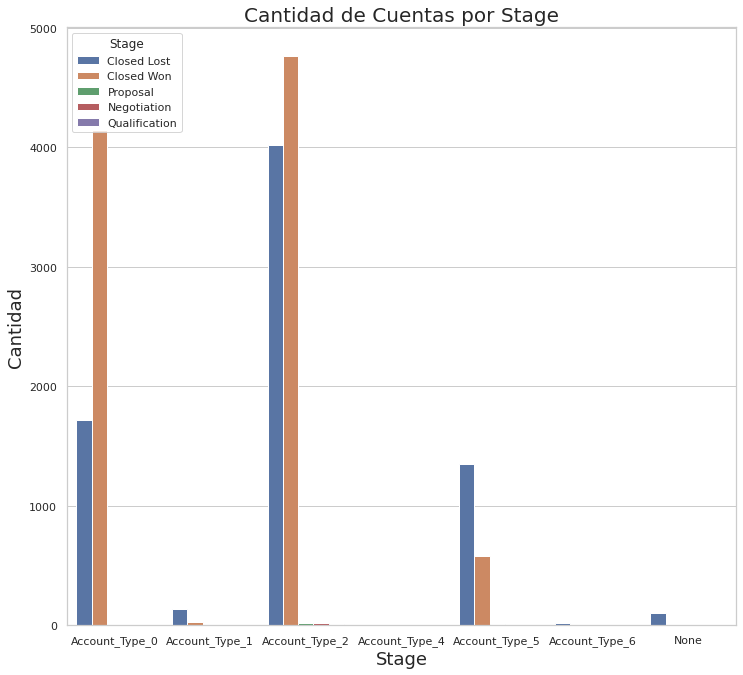

In [190]:
fig, ax = plt.subplots(figsize=(12,11))
 
g = sns.barplot(x=cuenta_estado['Account_Type'], y=cuenta_estado['cantidad'],hue="Stage",data=cuenta_estado,ax=ax)
g.set_title("Cantidad de Cuentas por Stage", fontsize=20)
g.set_xlabel("Stage", fontsize=18)
g.set_ylabel("Cantidad", fontsize=18)

-------------------------------------------------
####PRUEBAS, NO VEAN LOQUE SIGUE

In [19]:
entrenamiento.groupby(['Region','Territory']).agg(cantidad_muestra=('ID','count'))['cantidad_muestra'].transform(lambda x: x> (x.mean()-1100))

Region       Territory   
APAC         Australia       True
             Burma           True
             Cambodia        True
             China (PRC)     True
             India           True
                             ... 
Middle East  Oman            True
             Pakistan        True
             Saudi Arabia    True
             UAE (Dubai)     True
             UAE (Others)    True
Name: cantidad_muestra, Length: 85, dtype: bool

In [ ]:
lugares_cantidad_casos=entrenamiento.groupby(['Region'])['ID'].transform(lambda)

In [28]:
lugares_cantidad_casos=entrenamiento.groupby(['Region','Territory']).agg(cantidad_muestra=('ID','count'))
lugares_cantidad_casos.groupby(['Region'])['cantidad_muestra'].transform('mean')

Region       Territory   
APAC         Australia       203.875
             Burma           203.875
             Cambodia        203.875
             China (PRC)     203.875
             India           203.875
                              ...   
Middle East  Oman             18.400
             Pakistan         18.400
             Saudi Arabia     18.400
             UAE (Dubai)      18.400
             UAE (Others)     18.400
Name: cantidad_muestra, Length: 85, dtype: float64

In [36]:
entrenamiento.groupby(['Region'])['ID'].transform('sum')

0        70941823
1        70941823
2        68497466
3        68497466
4        68497466
           ...   
16942    70941823
16943    70941823
16944    70941823
16945    68497466
16946    68497466
Name: ID, Length: 16947, dtype: int64

In [90]:
entrenamiento.groupby(['Region'])['ID'].transform('mean')

0        15210.510935
1        15210.510935
2        17363.109252
3        17363.109252
4        17363.109252
             ...     
16942    15210.510935
16943    15210.510935
16944    15210.510935
16945    17363.109252
16946    17363.109252
Name: ID, Length: 16947, dtype: float64

In [15]:
lugares_cantidad_casos=entrenamiento.groupby(['Region','Territory']).agg(cantidad_muestra=('ID','count')).reset_index()
lugares_cantidad_casos.groupby(['Region','Territory']).transform(lambda x:x>x.mean())

,cantidad_muestra
0,False
1,False
2,False
3,False
4,False
...,...
80,False
81,False
82,False
83,False


In [106]:
lugares_cantidad_casos=entrenamiento.groupby(['Region','Territory']).agg(cantidad_muestra=('ID','count')).reset_index()
lugares_cantidad_casos

,Region,Territory,cantidad_muestra
0,APAC,Australia,1208
1,APAC,Burma,1
2,APAC,Cambodia,4
3,APAC,China (PRC),218
4,APAC,India,809
...,...,...,...
80,Middle East,Oman,4
81,Middle East,Pakistan,6
82,Middle East,Saudi Arabia,6
83,Middle East,UAE (Dubai),19


In [107]:
lugares_cantidad_casos=lugares_cantidad_casos

TypeError: ignored

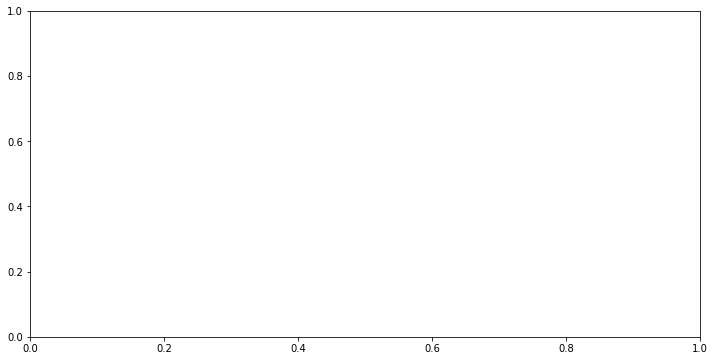

In [114]:
plt.figure(figsize=(12,6))
squarify.plot(sizes=[(25,50),(75,100),(125,56),(25,34),(15,98)],
              color=['red','blue','yellow','green','orange']*2,
              label=['A\n25','B\n50','C\n75','D\n100','E\n125']*2,
              pad )

plt.title('Treemap')
plt.axis('off');
# ; gets rid of extra text
# some IDEs/text editors may require plt.show()

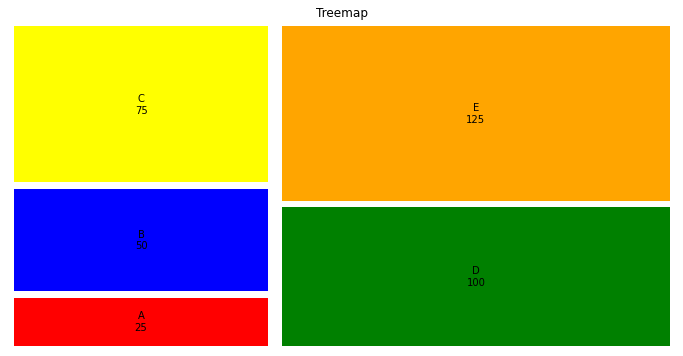

In [99]:
plt.figure(figsize=(12,6))
squarify.plot(sizes=[25,50,75,100,125],
              color=['red','blue','yellow','green','orange'],
              label=['A\n25','B\n50','C\n75','D\n100','E\n125'],
              pad=True)

plt.title('Treemap')
plt.axis('off');
# ; gets rid of extra text
# some IDEs/text editors may require plt.show()

In [116]:
lugares_cantidad_casos=entrenamiento.groupby(['Region']).agg(cantidad_muestra=('ID','count')).reset_index()


In [117]:
#Utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.
norm = matplotlib.colors.Normalize(vmin=min(lugares_cantidad_casos.cantidad_muestra), vmax=max(lugares_cantidad_casos.cantidad_muestra))
colors = [matplotlib.cm.Blues(norm(value)) for value in lugares_cantidad_casos.cantidad_muestra]

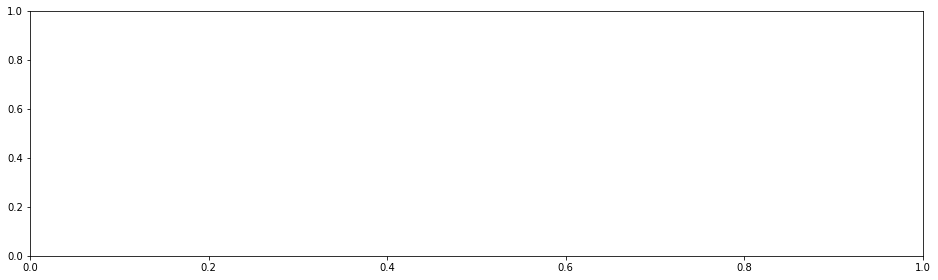

In [101]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)

In [ ]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)
#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(label=lugares_cantidad_casos.Region ,sizes=lugares_cantidad_casos.cantidad_muestra, color = colors, alpha=.6)
plt.title("Man City Goals",fontsize=23,fontweight="bold")

Text(0.5, 1.0, 'Man City Goals')

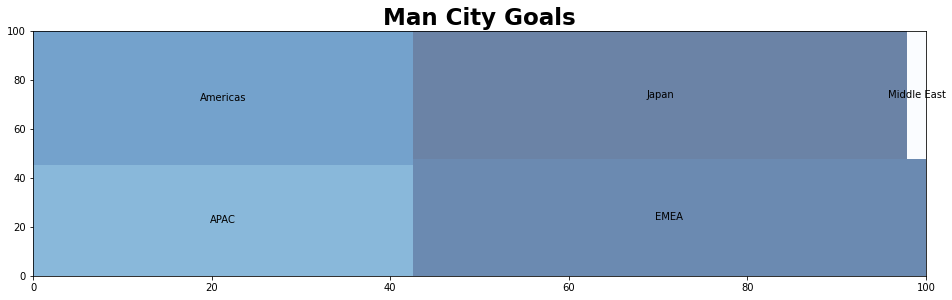

In [118]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)
#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(label=lugares_cantidad_casos.Region ,sizes=lugares_cantidad_casos.cantidad_muestra, color = colors, alpha=.6)
plt.title("Man City Goals",fontsize=23,fontweight="bold")

In [66]:
 
vendors = ["A", "B", "C", "D", None, "E", "F", "G", "H", None]
sectors = ["Tech", "Tech", "Finance", "Finance", "Other",
        "Tech", "Tech", "Finance", "Finance", "Other"]
regions = ["North", "North", "North", "North", "North",
        "South", "South", "South", "South", "South"]
sales = [1, 3, 2, 4, 1, 2, 2, 1, 4, 1]
df = pd.DataFrame(
    dict(vendors=vendors, sectors=sectors, regions=regions, sales=sales)
)
df["all"] = "all"  # in order to have a single root node

print(df)
fig = px.treemap(df, path=['all', 'regions',
                        'sectors', 'vendors'], values='sales')
fig.show()

  vendors  sectors regions  sales  all
0       A     Tech   North      1  all
1       B     Tech   North      3  all
2       C  Finance   North      2  all
3       D  Finance   North      4  all
4    None    Other   North      1  all
5       E     Tech   South      2  all
6       F     Tech   South      2  all
7       G  Finance   South      1  all
8       H  Finance   South      4  all
9    None    Other   South      1  all


TypeError: ignored

In [70]:
import treemap.render_to_file('treemap.html')

SyntaxError: ignored

In [60]:
!pip install squarify
!pip install pygal
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify
import pygal



     |████████████████████████████████| 133kB 1.4MB/s 


b'<?xml version=\'1.0\' encoding=\'utf-8\'?>\n<svg xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" id="chart-b5a57839-5a37-4afc-a0b2-0d96451e142d" class="pygal-chart" viewBox="0 0 800 600"><!--Generated with pygal 2.4.0 (lxml) \xc2\xa9Kozea 2012-2016 on 2020-10-30--><!--http://pygal.org--><!--http://github.com/Kozea/pygal--><defs><style type="text/css">#chart-b5a57839-5a37-4afc-a0b2-0d96451e142d{-webkit-user-select:none;-webkit-font-smoothing:antialiased;font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace}#chart-b5a57839-5a37-4afc-a0b2-0d96451e142d .title{font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace;font-size:16px}#chart-b5a57839-5a37-4afc-a0b2-0d96451e142d .legends .legend text{font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace;font-size:14px}#chart-b5a57839-5a37-4afc-a0b2-0d96451e142d .axis text{font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace;font-size:10px}#chart-b5a57839-5a37-4afc-a0b2-0d96451e142

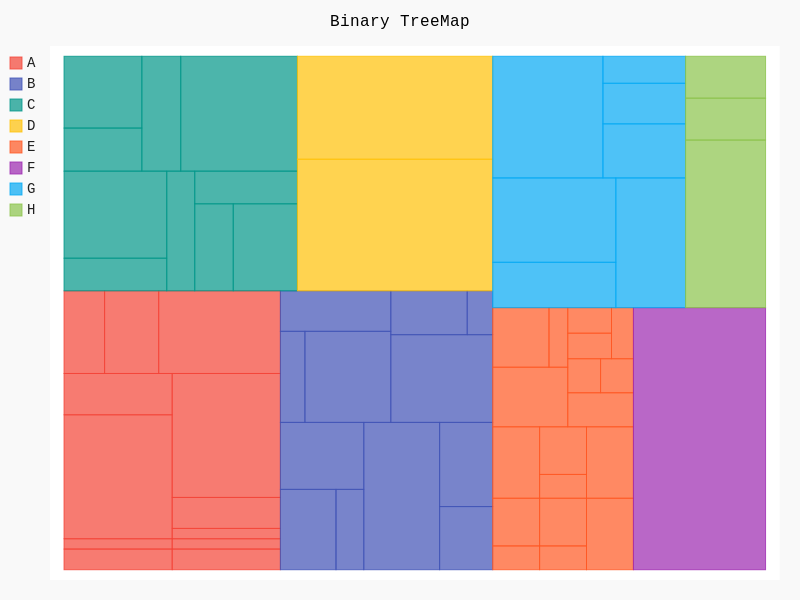

In [77]:
#!pip install cairosvg
#import cairosvg
treemap = pygal.Treemap()
treemap.title = 'Binary TreeMap'
treemap.add('A', [2, 1, 12, 4, 2, 1, 1, 3, 12, 3, 4, None, 9])
treemap.add('B', [4, 2, 5, 10, 3, 4, 2, 7, 4, -10, None, 8, 3, 1])
treemap.add('C', [3, 8, 3, 3, 5, 3, 3, 5, 4, 12])
treemap.add('D', [23, 18])
treemap.add('E', [1, 2, 1, 2, 3, 3, 1, 2, 3,
      4, 3, 1, 2, 1, 1, 1, 1, 1])
treemap.add('F', [31])
treemap.add('G', [5, 9.3, 8.1, 12, 4, 3, 2])
treemap.add('H', [12, 3, 3])
treemap.add_squares()
treemap

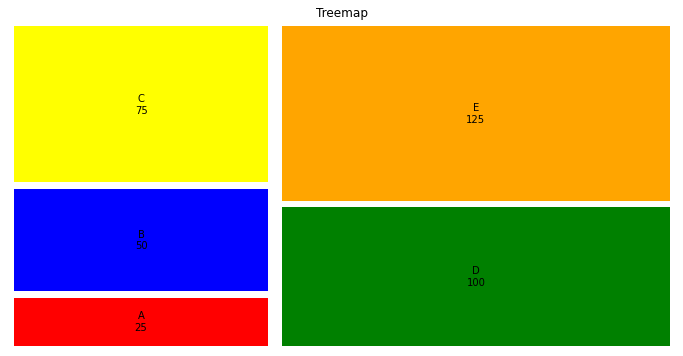

In [89]:
plt.figure(figsize=(12,6))
squarify.plot(sizes=[25,50,75,100,125],
              color=['red','blue','yellow','green','orange'],
              label=['A\n25','B\n50','C\n75','D\n100','E\n125'],
              pad=True)

plt.title('Treemap')
plt.axis('off');
# ; gets rid of extra text
# some IDEs/text editors may require plt.show()

In [62]:
import squarify
import matplotlib.pyplot as plt
import numpy as np
from vega_datasets import data as vds
import pygal

In [63]:
squarify.plot?

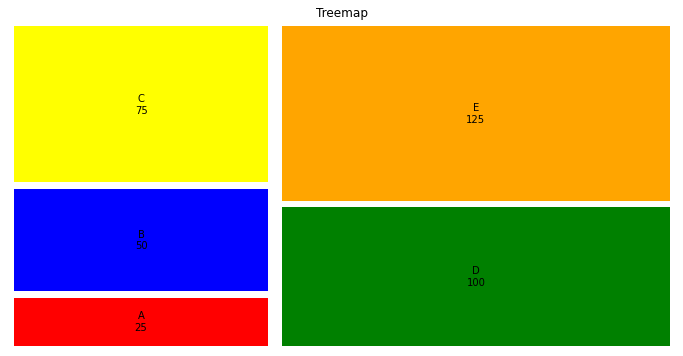

In [64]:
plt.figure(figsize=(12,6))
squarify.plot(sizes=[25,50,75,100,125],
              color=['red','blue','yellow','green','orange'],
              label=['A\n25','B\n50','C\n75','D\n100','E\n125'],
              pad=True)

plt.title('Treemap')
plt.axis('off');
# ; gets rid of extra text
# some IDEs/text editors may require plt.show()

In [ ]:
import plotly.express as pxfig = px.treemap(df, 
                 path=['Platform', 'Genre'], 
                 values='Global_Sales',
                 color='NA_Sales'
                )fig.show()

In [68]:
 import plotly.express as px
 fig = px.treemap(df, 
                 path=['Platform', 'Genre'], 
                 values='Global_Sales',
                 color='NA_Sales'
                )
 fig.show()

TypeError: ignored

In [ ]:
# If you have a data frame?

df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })
squarify.plot(sizes=df['nb_people'], label=df['group'], alpha=.8 )
plt.axis('off')
plt.show() 

In [ ]:
import plotly.express as px
import pandas as pd
from collections import defaultdict

data = defaultdict()

data['level_1'] = ['A', 'A', 'A', 'B', 'B', 'B']
data['level_2'] = ['X', 'X', 'Y', 'Z', 'Z', 'X']
data['level_3'] = ['1', '2', '2', '1', '1', '2']

data =  pd.DataFrame.from_dict(data)
fig = px.treemap(data, path=['level_1', 'level_2', 'level_3'])
fig.show()


In [ ]:
entrenamiento.ASP.value_counts()

0.38000    801
0.40000    712
0.36000    564
0.42000    510
0.39000    465
          ... 
0.34730      1
0.27400      1
0.25300      1
0.45789      1
0.24400      1
Name: ASP, Length: 301, dtype: int64

In [ ]:
entrenamiento.Stage.value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

In [ ]:
entrenamiento.columns

Index(['ID', 'Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source ',
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currenc

In [ ]:
entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

In [120]:
entrenamiento[['Total_Amount_Currency','Total_Taxable_Amount_Currency']]

,Total_Amount_Currency,Total_Taxable_Amount_Currency
0,EUR,EUR
1,EUR,EUR
2,USD,USD
3,USD,USD
4,USD,USD
...,...,...
16942,EUR,EUR
16943,EUR,EUR
16944,EUR,EUR
16945,USD,USD


In [123]:
entrenamiento[['Stage','Month']]

,Stage,Month
0,Closed Lost,2016 - 5
1,Closed Won,2016 - 1
2,Closed Won,2016 - 1
3,Closed Lost,2018 - 2
4,Closed Lost,2018 - 2
...,...,...
16942,Closed Won,2016 - 3
16943,Closed Won,2016 - 4
16944,Closed Won,2016 - 3
16945,Closed Lost,2016 - 4


In [ ]:
data.plot(x='year', y='ct', ax=ax, label=key)

In [131]:
df.groupby(['mes','Stage']).agg(cantidad_muestra=())

10    1676
3     1630
6     1563
7     1492
4     1484
5     1396
2     1388
1     1299
11    1291
9     1280
8     1271
12    1177
Name: mes, dtype: int64

TypeError: ignored

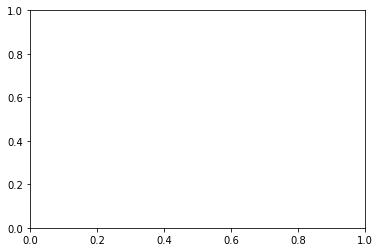

In [124]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in entrenamiento.groupby('Stage'):
    data.plot(x='Stage', y='Month', ax=ax, label=key)

In [ ]:
entrenamiento['Total_Amount'].value_counts()

6200.0        513
4400.0        461
18000.0       353
140000.0      272
1600.0        204
             ... 
193600.0        1
4972.8          1
8001840.0       1
12333750.0      1
11960.0         1
Name: Total_Amount, Length: 8872, dtype: int64

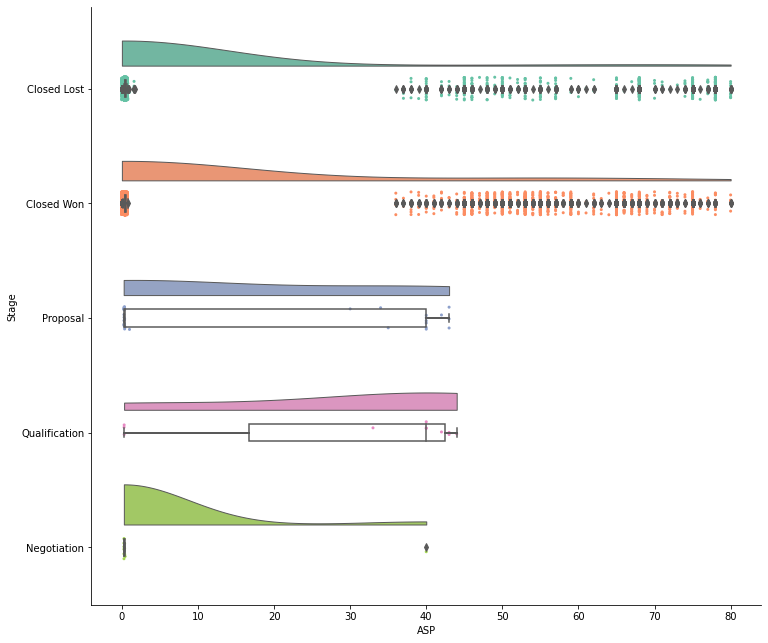

In [ ]:
fig, ax = plt.subplots(figsize=(12,11))
ax = pt.RainCloud(data = entrenamiento, x = 'Stage', y = 'ASP', 
                  orient='h',
                 bw=.8, ax=ax
                 )
sns.despine()


In [ ]:
entrenamiento.groupby(['Billing_Country'])['Billing_Country'].transform('count')

0         563
1         563
2        3802
3        3802
4        3802
         ... 
16942     145
16943     145
16944     145
16945    3802
16946    3802
Name: Billing_Country, Length: 16947, dtype: int64

In [ ]:
entrenamiento['Billing_Country'].value_counts()

Japan                     4879
United States             3802
Germany                   1979
Australia                 1169
India                      672
                          ... 
Dominican Republic           1
Ecuador                      1
Bosnia and Herzegovina       1
Libya                        1
Peru                         1
Name: Billing_Country, Length: 80, dtype: int64

In [ ]:
entrenamiento['Billing_Country'].describe()


count     16947
unique       80
top       Japan
freq       4879
Name: Billing_Country, dtype: object

In [ ]:
billing_country_stage=entrenamiento.groupby(['Billing_Country','Stage']).agg(cantidad=('Stage','count')).unstack(level='Stage')

In [ ]:
billing_country_stage.columns=['Closed Lost'   ,'Closed Won',  'Negotiation',     'Proposal','Qualification']

In [ ]:
billing_country_stage

,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Billing_Country,,,,,
Albania,2.0,NaN,NaN,NaN,NaN
Argentina,1.0,NaN,NaN,NaN,NaN
Armenia,2.0,NaN,NaN,NaN,NaN
Australia,470.0,695.0,NaN,4.0,NaN
Austria,23.0,122.0,NaN,NaN,NaN
...,...,...,...,...,...
Turkey,10.0,7.0,NaN,NaN,NaN
United Arab Emirates,33.0,5.0,1.0,2.0,NaN
United Kingdom,157.0,127.0,NaN,NaN,NaN


Text(32.99999999999999, 0.5, 'Año de Lanzamiento del Proyecto')

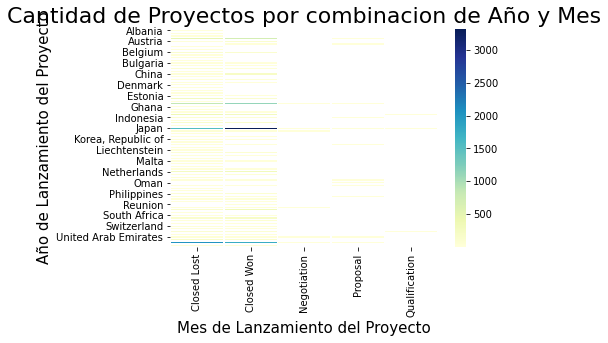

In [ ]:


g = sns.heatmap(billing_country_stage, linewidths=.5, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de Proyectos por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=15)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=15)



In [ ]:
billing_country_stage.nlargest(10,'Closed Lost')

,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Billing_Country,,,,,
United States,2035.0,1755.0,8.0,4.0,NaN
Japan,1533.0,3323.0,1.0,14.0,8.0
Germany,855.0,1122.0,1.0,1.0,NaN
Australia,470.0,695.0,NaN,4.0,NaN
India,387.0,284.0,NaN,NaN,1.0
France,285.0,111.0,NaN,NaN,NaN
Netherlands,248.0,315.0,NaN,NaN,NaN
United Kingdom,157.0,127.0,NaN,NaN,NaN
Italy,143.0,152.0,NaN,NaN,NaN


Text(87.0, 0.5, 'Año de Lanzamiento del Proyecto')

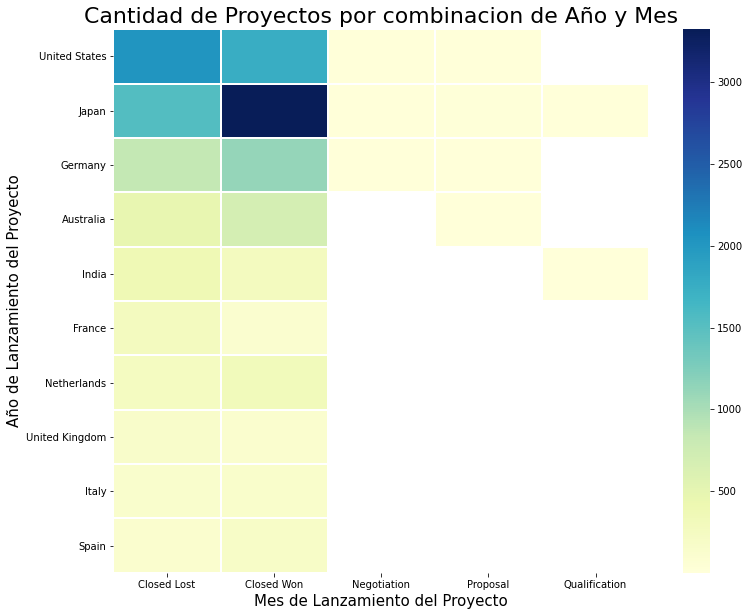

In [ ]:
fig, ax = plt.subplots(figsize=(12,10) )
g = sns.heatmap(billing_country_stage.nlargest(10,'Closed Lost'), ax=ax, linewidths=.9, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de Proyectos por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=15)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=15)


In [ ]:
billing_country_stage.nlargest(10,'Closed Won')

,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Billing_Country,,,,,
Japan,1533.0,3323.0,1.0,14.0,8.0
United States,2035.0,1755.0,8.0,4.0,NaN
Germany,855.0,1122.0,1.0,1.0,NaN
Australia,470.0,695.0,NaN,4.0,NaN
Singapore,114.0,318.0,NaN,NaN,NaN
Netherlands,248.0,315.0,NaN,NaN,NaN
India,387.0,284.0,NaN,NaN,1.0
China,19.0,203.0,NaN,NaN,NaN
Spain,125.0,192.0,NaN,NaN,NaN


In [ ]:
entrenamiento.groupby(['Month','entrenamiento']).agg(stage_by_month=('Delivery_Year','count'))

KeyError: ignored

Acountype y su relacion

In [ ]:
entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

In [ ]:
entrenamiento['Account_Type'].value_counts()

Account_Type_2    8832
Account_Type_0    5868
Account_Type_5    1943
Account_Type_1     165
None               112
Account_Type_6      17
Account_Type_4      10
Name: Account_Type, dtype: int64

In [148]:
account_stage=entrenamiento.groupby(['Account_Type','Stage']).agg(cantidad=('Stage','count')).unstack(level='Stage').fillna(0)
account_stage.columns=['Closed Lost','Closed Won','Negotiation','Proposal',' 	Qualification']
account_stage

,Closed Lost,Closed Won,Negotiation,Proposal,\tQualification
Account_Type,,,,,
Account_Type_0,1718.0,4148.0,0.0,2.0,0.0
Account_Type_1,133.0,31.0,0.0,1.0,0.0
Account_Type_2,4021.0,4765.0,17.0,21.0,8.0
Account_Type_4,6.0,4.0,0.0,0.0,0.0
Account_Type_5,1351.0,577.0,1.0,11.0,3.0
Account_Type_6,16.0,1.0,0.0,0.0,0.0
None,105.0,7.0,0.0,0.0,0.0


In [159]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


AttributeError: ignored

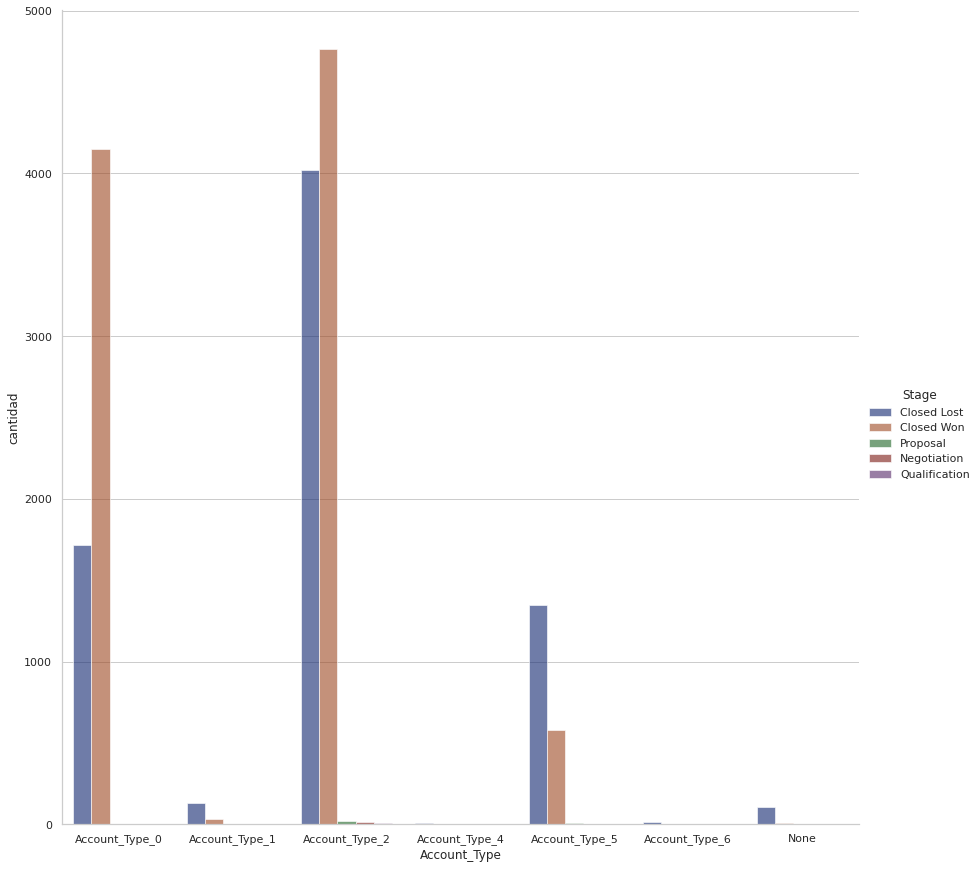

In [177]:
#fig, ax = plt.subplots(figsize=(12,11))
 

 

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=cuenta_estado, kind="bar",
    x="Account_Type", y="cantidad", hue="Stage",
    ci="sd", palette="dark", alpha=.6, height=12
)

#g.set_title("Cantidad de Estados por Tipo y Anio", fontsize=22)
#g.set_xlabel("Cantidad por Estado",fontsize=15)
#g.set_ylabel("Anio", fontsize=15)


g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

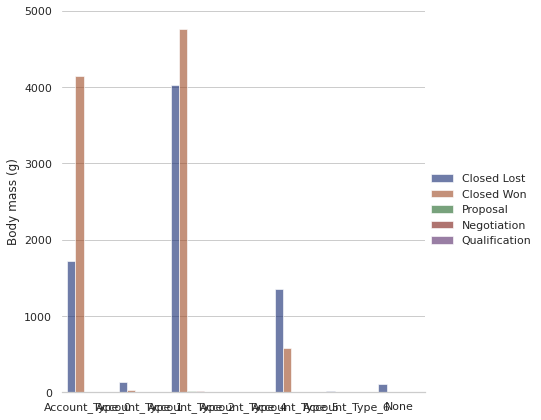

In [164]:
fig, ax = plt.subplots(figsize=(12,11))
g=sns.lineplot(data=df2, x="anio", y="cant", hue="Stage",ax=ax)
g.set_title("Cantidad de Estados por Tipo y Anio", fontsize=22)
g.set_xlabel("Cantidad por Estado",fontsize=15)
g.set_ylabel("Anio", fontsize=15)

sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=cuenta_estado, kind="bar",
    x="Account_Type", y="cantidad", hue="Stage",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

In [153]:
l=account_stage.columns.to_list()

In [154]:
g = sns.barplot(x=account_stage.Account_Type, y=account_stage.index,  hue=l,orient='h')
g.set_title("Canciones por Genero Principal", fontsize=15)
g.set_xlabel("Numero de canciones", fontsize=12)
g.set_ylabel("Genero", fontsize=12)

Exception: ignored

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


Text(86.09375, 0.5, 'Tipo de Cuenta')

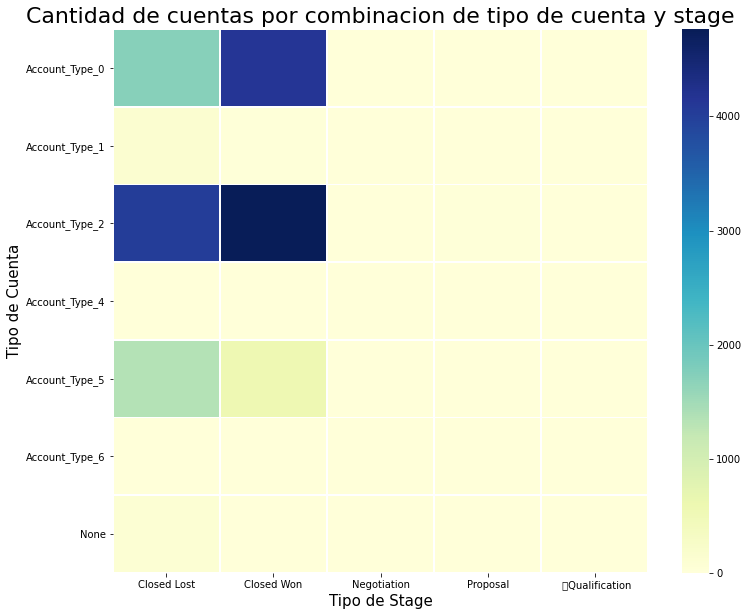

In [ ]:
fig, ax = plt.subplots(figsize=(12,10) )
g = sns.heatmap(account_stage, ax=ax, linewidths=.9, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de cuentas por combinacion de tipo de cuenta y stage", fontsize=22)
g.set_xlabel("Tipo de Stage",fontsize=15)
g.set_ylabel("Tipo de Cuenta", fontsize=15)


In [ ]:
relacion=entrenamiento.groupby(['Account_Type','Territory']).agg(cantidadTerritorio=('Stage','count'))
relacion.columns=['cantidad_cuentas_territorio']
relacion.head()

cantidad_cuentas_territorio
Account_Type   Territory                                        
Account_Type_0 Australia                                     870
               Austria                                       139
               Belgium                                       133
               Bosnia & Herzegovina                            3
               Bulgaria                                        1

In [ ]:
relacion['account_territory_media']=relacion['cantidad_cuentas_territorio'].transform(lambda x: x> x.mean())

In [ ]:
acount_territory=relacion[relacion['account_territory_media']]
acount_territory.head()


cantidad_cuentas_territorio  account_territory_media
Account_Type   Territory                                                        
Account_Type_0 Australia                            870                     True
               Austria                              139                     True
               Belgium                              133                     True
               China (PRC)                          213                     True
               France                               127                     True

In [ ]:
acount_territory=acount_territory.reset_index()
acount_territory[['Account_Type','cantidad_cuentas_territorio']]

,Account_Type,cantidad_cuentas_territorio
0,Account_Type_0,870
1,Account_Type_0,139
2,Account_Type_0,133
3,Account_Type_0,213
4,Account_Type_0,127
5,Account_Type_0,928
6,Account_Type_0,110
7,Account_Type_0,248
8,Account_Type_0,464
9,Account_Type_0,109


TypeError: ignored

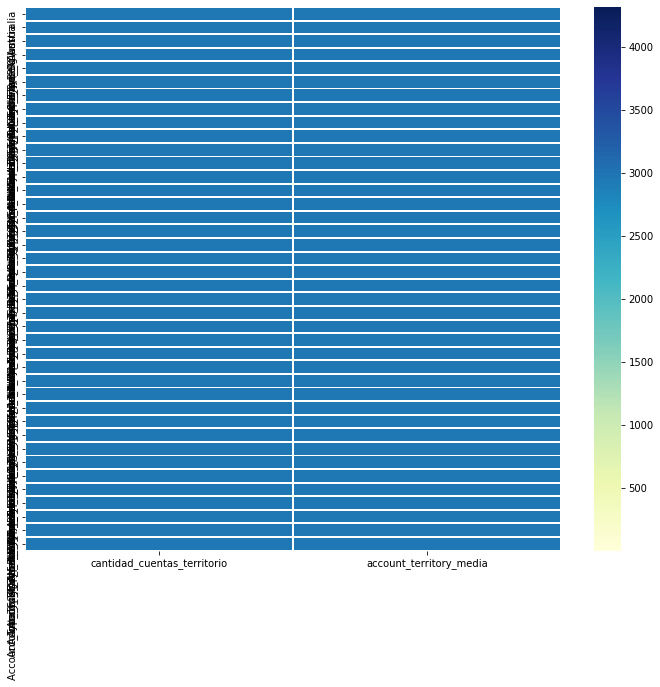

In [ ]:
fig, ax = plt.subplots(figsize=(12,10) )
g = sns.heatmap(acount_territory, ax=ax, linewidths=.9, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de Proyectos por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=15)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=15)


,Account_Type,Territory,cantidad_cuentas_territorio,account_territory_media
0,Account_Type_0,Australia,870,True
1,Account_Type_0,Austria,139,True
2,Account_Type_0,Belgium,133,True
3,Account_Type_0,China (PRC),213,True
4,Account_Type_0,France,127,True
5,Account_Type_0,Germany,928,True
6,Account_Type_0,India,110,True
7,Account_Type_0,Italy,248,True
8,Account_Type_0,Japan,464,True
9,Account_Type_0,NE America,109,True


In [ ]:
fig, ax = plt.subplots(figsize=(12,11))
ax = pt.RainCloud(data = entrenamiento, x = 'Stage', y = 'ASP', 
                  orient='h',
                 bw=.8, ax=ax
                 )
sns.despine()


In [ ]:
entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

In [ ]:
entrenamiento[['Stage','Opportunity_Created_Date']]

KeyError: ignored

In [ ]:
df=entrenamiento[['Stage','Opportunity_Created_Date']]
df['opportunity_created_year']=pd.to_datetime(entrenamiento['Opportunity_Created_Date'])
df['year']=df['opportunity_created_year'].dt.year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


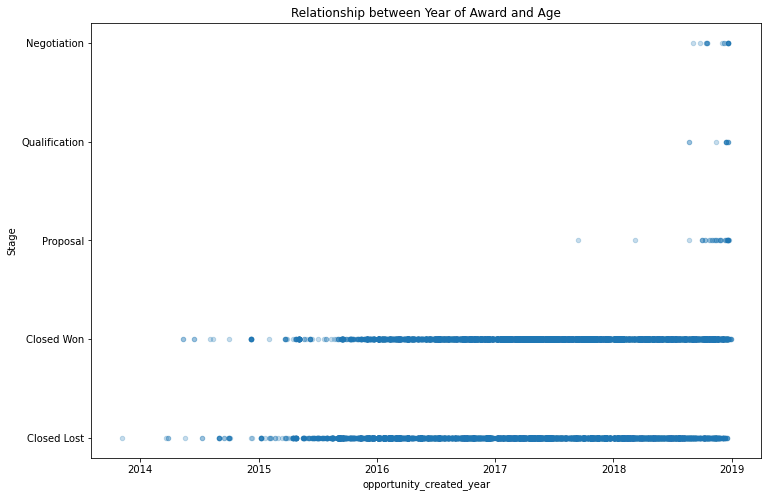

In [ ]:
df.plot.scatter('opportunity_created_year', 'Stage' , title='Relationship between Year of Award and Age',alpha=0.25,figsize=(12,8));

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Stage                     16947 non-null  object        
 1   Opportunity_Created_Date  16947 non-null  object        
 2   opportunity_created_year  16947 non-null  datetime64[ns]
 3   year                      16947 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 529.7+ KB


Text(0, 0.5, 'BPM')

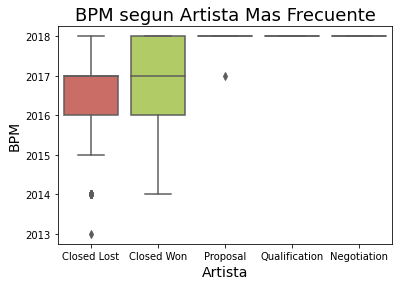

In [ ]:
g = sns.boxplot(x="Stage",y="year", 
                     data=df, palette="hls")
g.set_title("BPM segun Artista Mas Frecuente", fontsize=18)
g.set_xlabel("Artista", fontsize=14)
g.set_ylabel("BPM", fontsize=14)

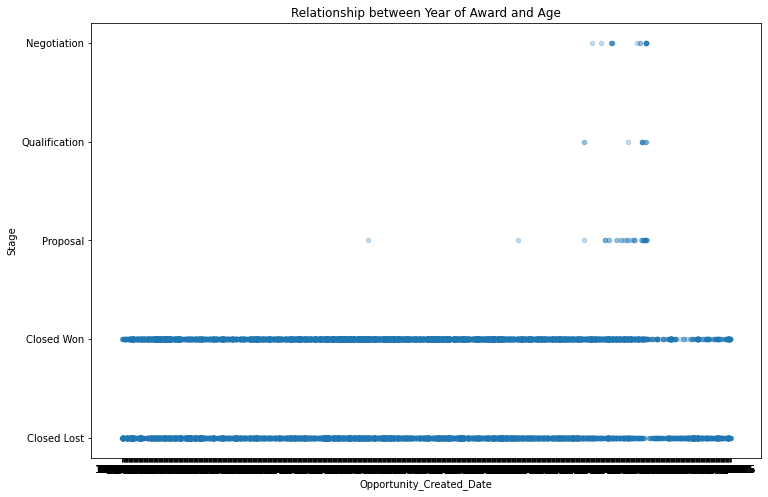

In [ ]:
entrenamiento.plot.scatter('Opportunity_Created_Date', 'Stage' , title='Relationship between Year of Award and Age',alpha=0.25,figsize=(12,8));

delibery terms y su relacion con stage

In [ ]:
entrenamiento['Opportunity_Created_Date ''Delivery_Terms'].value_counts()

KeyError: ignored

In [ ]:
fig, ax = plt.subplots(figsize=(12,10) )
g = sns.heatmap(acount_territory, ax=ax, linewidths=.9, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de Proyectos por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=15)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=15)

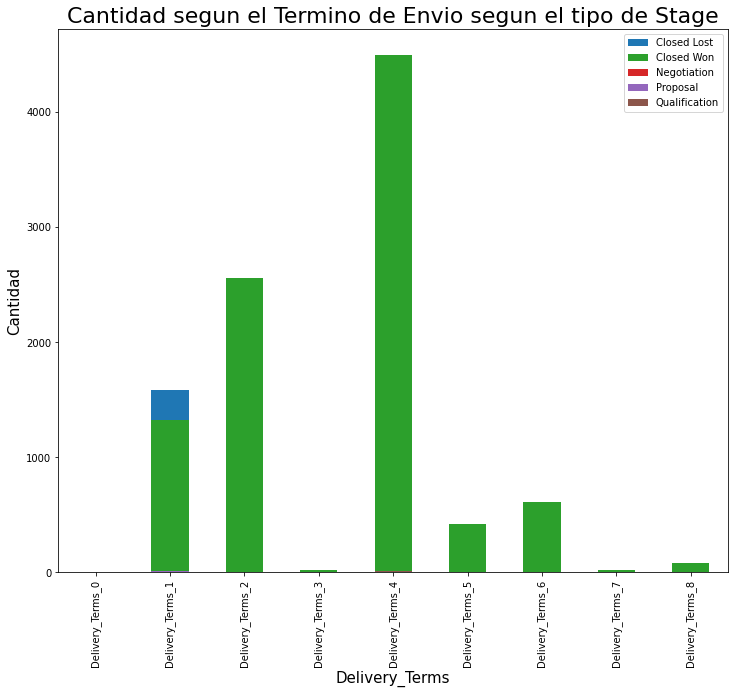

In [ ]:
fig, ax = plt.subplots(figsize=(12,10) ) 
ax = delivery_terms_stage.plot(x="Delivery_Terms", y="Closed Lost", kind="bar", ax=ax)
ax.set_title("Cantidad segun el Termino de Envio segun el tipo de Stage", fontsize=22)
ax.set_xlabel("Stage",fontsize=15)
ax.set_ylabel("Cantidad", fontsize=15)  
delivery_terms_stage.plot(x="Delivery_Terms", y="Closed Won", kind="bar", ax=ax, color="C2")
delivery_terms_stage.plot(x="Delivery_Terms", y="Negotiation", kind="bar", ax=ax, color="C3")
delivery_terms_stage.plot(x="Delivery_Terms", y="Proposal", kind="bar", ax=ax, color="C4")
delivery_terms_stage.plot(x="Delivery_Terms", y="Qualification", kind="bar", ax=ax, color="C5")
 
plt.show()

In [ ]:
y = np.random.rand(10,4)
y[:,0]= np.arange(10)
df = pd.DataFrame(y, columns=["X", "A", "B", "C"])

ax = df.plot(x="X", y="A", kind="bar")
df.plot(x="X", y="B", kind="bar", ax=ax, color="C2")
df.plot(x="X", y="C", kind="bar", ax=ax, color="C3")

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,11))
ax = pt.RainCloud(data = entrenamiento, x = 'Stage', y = 'ASP', 
                  orient='h',
                 bw=.8, ax=ax
                 )
sns.despine()


In [ ]:
entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

In [ ]:
entrenamiento['Account_Name'].value_counts()

Account_Name_1888    2124
Account_Name_1836     886
Account_Name_25       752
Account_Name_1991     586
Account_Name_1642     397
                     ... 
Account_Name_1960       1
Account_Name_1718       1
Account_Name_343        1
Account_Name_819        1
Account_Name_310        1
Name: Account_Name, Length: 1635, dtype: int64

In [ ]:
entrenamiento['Pricing, Delivery_Terms_Approved'].value_counts()

1    9890
0    7057
Name: Pricing, Delivery_Terms_Approved, dtype: int64

In [ ]:
entrenamiento.groupby(['Account_Name','Pricing, Delivery_Terms_Approved']).agg(cant=('Stage','count')).nlargest(10,'cant')

cant
Account_Name      Pricing, Delivery_Terms_Approved      
Account_Name_1888 0                                 1088
                  1                                 1036
Account_Name_1836 1                                  802
Account_Name_1991 1                                  488
Account_Name_25   1                                  455
Account_Name_1508 1                                  340
Account_Name_25   0                                  297
Account_Name_1642 1                                  246
Account_Name_1440 1                                  214
Account_Name_931  1                                  188

In [ ]:
entrenamiento.loc[entrenamiento['Stage']=='Closed Won',:].groupby(['Account_Name','Stage']).agg(cant=('Stage','count')).nlargest(20,'cant')

,,cant
Account_Name,Stage,
Account_Name_1888,Closed Won,1018
Account_Name_1836,Closed Won,795
Account_Name_25,Closed Won,539
Account_Name_1991,Closed Won,520
Account_Name_1508,Closed Won,323
Account_Name_1440,Closed Won,267
Account_Name_263,Closed Won,205
Account_Name_1642,Closed Won,204
Account_Name_931,Closed Won,203


In [ ]:
#Europa, Oriente Medio y África.
entrenamiento.groupby(['Account_Name','Region']).agg(cant=('Stage','count')).nlargest(20,'cant')

,,cant
Account_Name,Region,
Account_Name_1888,Japan,2124
Account_Name_1836,Japan,886
Account_Name_25,Americas,752
Account_Name_1991,Japan,586
Account_Name_1642,APAC,397
Account_Name_1508,Japan,355
Account_Name_1440,APAC,317
Account_Name_533,EMEA,283
Account_Name_263,EMEA,249


In [ ]:
ka=entrenamiento.groupby(['Region','Account_Name']).agg(cant=('Stage','count')).nlargest(20,'cant').groupby(['Region','Account_Name'],level='Region')

In [ ]:
#for key, item in ka:
#    print(ka.get_group(key), "\n\n")

In [ ]:
z=entrenamiento.loc[entrenamiento['Stage']=='Closed Won',:].groupby(['Region','Account_Name']).agg(cant=('Account_Name','count'))\
.nlargest(20,'cant').reset_index()
z



,Region,Account_Name,cant
0,Japan,Account_Name_1888,1018
1,Japan,Account_Name_1836,795
2,Americas,Account_Name_25,539
3,Japan,Account_Name_1991,520
4,Japan,Account_Name_1508,323
5,APAC,Account_Name_1440,267
6,EMEA,Account_Name_263,205
7,APAC,Account_Name_1642,204
8,APAC,Account_Name_931,203
9,EMEA,Account_Name_533,190


In [ ]:
sns.scatterplot(z, x="Account_Name", y="Region")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

In [ ]:
entrenamiento['acount_amount_mayor_media']=entrenamiento.loc[entrenamiento['Stage']=='Closed Won',:].groupby(['Region','Account_Name']).agg(cant=('Account_Name','count'))\
.reset_index().groupby('Region')['cant'].transform(lambda x: x>x.mean())

In [ ]:
entrenamiento['acount_amount_mayor_media'].value_counts()

False    556
True     115
Name: acount_amount_mayor_media, dtype: int64

In [ ]:
entrenamiento.loc[entrenamiento['acount_amount_mayor_media']==True,:].groupby(['Region','Account_Name']).agg(cant=('Account_Name','count'))\


cant
Region   Account_Name           
APAC     Account_Name_1041     1
         Account_Name_1394     1
         Account_Name_1440     2
         Account_Name_1920     1
         Account_Name_461      1
         Account_Name_993      1
Americas Account_Name_1159     1
         Account_Name_1226     1
         Account_Name_1428     1
         Account_Name_1547     1
         Account_Name_1662     1
         Account_Name_1794     1
         Account_Name_1808     1
         Account_Name_1866     1
         Account_Name_1925     1
         Account_Name_217      1
         Account_Name_961      3
EMEA     Account_Name_1274     1
         Account_Name_1374     1
         Account_Name_1459     1
         Account_Name_1826     1
         Account_Name_2021     2
         Account_Name_2060     1
         Account_Name_446      1
         Account_Name_459      1
         Account_Name_533      3
         Account_Name_59       1
         Account_Name_673      1
         Account_Name_686      2
         Account_Name_951      1
Japan    Account_Name_1522     3
         Account_Name_1836     1
         Account_Name_1888    71
         Account_Name_1991     3

In [ ]:
entrenamiento.loc[entrenamiento['Stage']=='Closed Won',:].groupby(['Region','Account_Name']).agg(cant=('Account_Name','count'))\
.nlargest(20,'cant').reset_index()


,Region,Account_Name,cant
0,Japan,Account_Name_1888,1018
1,Japan,Account_Name_1836,795
2,Americas,Account_Name_25,539
3,Japan,Account_Name_1991,520
4,Japan,Account_Name_1508,323
5,APAC,Account_Name_1440,267
6,EMEA,Account_Name_263,205
7,APAC,Account_Name_1642,204
8,APAC,Account_Name_931,203
9,EMEA,Account_Name_533,190


In [ ]:
entrenamiento['Region'].value_counts()

Japan          4892
EMEA           4664
Americas       3945
APAC           3262
Middle East     184
Name: Region, dtype: int64